In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyamtrack

# single number calculations

In [2]:
energy_MeV = 150

In [3]:
pyamtrack.converters.beta_from_energy(energy_MeV)

0.5080917028494696

# lists and numpy arrays

In [4]:
energy_MeV_to_plot = np.linspace(start=0, stop=300, num=100)
beta_to_plot = pyamtrack.converters.beta_from_energy(energy_MeV_to_plot)

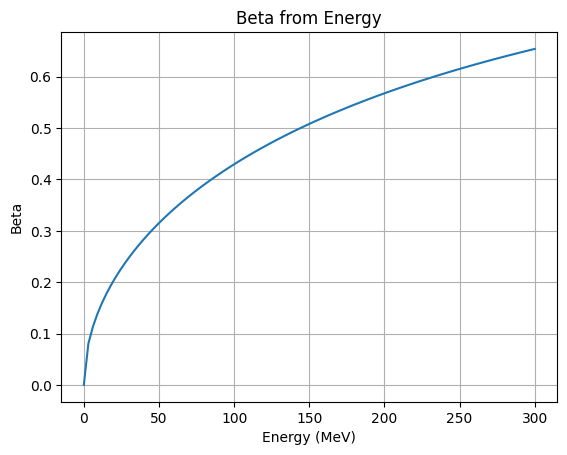

In [5]:
fig, ax = plt.subplots()
ax.plot(energy_MeV_to_plot, beta_to_plot)
ax.set_xlabel("Energy (MeV)")
ax.set_ylabel("Beta")
ax.set_title("Beta from Energy")
ax.grid()

In [6]:
# lets put couple of integers and floats in the list
energies = [0, 1.5, 60, 230.5]
pyamtrack.converters.beta_from_energy(energies)

[0.0, 0.05668218307450857, 0.34258931676084925, 0.5978150064324464]

# Cartesian product

In [7]:
import pyamtrack
import numpy as np

args = (
    np.array([100, 100, 200, 100]),
    np.array([1, 2, 3, 4]),
    np.array([2, 3]),
)

res = pyamtrack.stopping.electron_range(
    *args,
    cartesian_product=True,
)

res[0, 0, 1], pyamtrack.stopping.electron_range(100, 1, 3)

(np.float64(0.000522691356388691), 0.000522691356388691)

In [8]:
res = pyamtrack.stopping.electron_range(
    np.array([100, 200, 300, 400]).reshape(2, 2),
    np.array([1, 2, 3, 4]),
    np.array([2, 3]),
    cartesian_product=True,
)

res.shape

(2, 2, 4, 2)

In [9]:
res[0, 0, 1, 1], pyamtrack.stopping.electron_range(100, 2, 3)

(np.float64(0.00013166029128178612), 0.00013166029128178612)

In [10]:
res = pyamtrack.stopping.electron_range(
    [150., 200., 300.],
    1,
    [pyamtrack.stopping.models.tabata, pyamtrack.stopping.models.edmund],
    cartesian_product=True,
)
res.shape

(3, 2)

In [11]:
args = [
        np.random.uniform(900, 1100, 1),
        np.random.randint(2, 8, 5),
        np.random.randint(2, 8, 2),
    ]

output = pyamtrack.stopping.electron_range(
    *args,
    cartesian_product=True,
)

print(output.shape)

for i in range(3):
    if len(args[i]) <= 1:
        args[i] = float(args[i][0].item())

output = pyamtrack.stopping.electron_range(
    *args,
    cartesian_product=True,
)

print(output.shape)

(1, 5, 2)
(5, 2)


In [12]:
pyamtrack.stopping.electron_range(
    np.array([150., 200., 300.])[::2],
    1,
    [pyamtrack.stopping.models.tabata, pyamtrack.stopping.models.edmund],
    cartesian_product=True,
)

TypeError: NDArray must be C-contiguous. Use numpy.ascontiguousarray(your_array) before passing it.

In [65]:
res = pyamtrack.stopping.electron_range(
    np.ascontiguousarray(np.array([150., 200., 300., 400.])[::2]),
    1,
    [pyamtrack.stopping.models.tabata, pyamtrack.stopping.models.edmund],
    cartesian_product=True,
)

print(res.shape)

res[1, 1], pyamtrack.stopping.electron_range(300, 1, pyamtrack.stopping.models.edmund)

(2, 2)


(np.float64(0.003919871246818598), 0.003919871246818598)